<div style="text-align:center; background-color: #f0f0f0; padding: 12px;">
    <h1 style="background-color: #007acc; color: white; padding: 10px;"><b>Métodos no paramétricos </b></h1>
    <p><strong>Materia:</strong> Cómputo de Alto Rendimiento</p>
    <p><strong>Programa:</strong> Maestría en Ciencia de Datos e Información, INFOTEC</p>
    <p><strong>Alumno:</strong> Rodrigo Guarneros Gutiérrez</p>
</div>

In [65]:
# Dependencias
import requests
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import ipywidgets as widgets

In [13]:
url = "https://www.stat.cmu.edu/~larry/all-of-statistics/=Rprograms/a1882_25.dat"

response = requests.get(url, verify=False)

if response.status_code == 200:
    page_content = response.text

    df = pd.read_csv(StringIO(page_content), delim_whitespace=True, header=None)

    print(df)

else:
    print("Fallo")


C:\Users\rodri\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.stat.cmu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


            0         1         2
0     212.818 -0.959740  0.087054
1     212.685 -0.864120  0.140090
2     212.612 -0.832380  0.025562
3     212.636 -0.841852  0.025397
4     212.901 -0.956732  0.172551
...       ...       ...       ...
1420  216.082  0.249410  0.103185
1421  216.058  0.116049  0.150455
1422  216.014  0.499399  0.124921
1423  215.842  0.837500  0.408984
1424  215.754  0.905234  0.103613

[1425 rows x 3 columns]


In [15]:
df

,0,1,2
0,212.818,-0.959740,0.087054
1,212.685,-0.864120,0.140090
2,212.612,-0.832380,0.025562
3,212.636,-0.841852,0.025397
4,212.901,-0.956732,0.172551
...,...,...,...
1420,216.082,0.249410,0.103185
1421,216.058,0.116049,0.150455
1422,216.014,0.499399,0.124921
1423,215.842,0.837500,0.408984


In [22]:
D = np.array(df)
D = D[:,2]
D = D[D <= 0.2]
D

array([0.087054, 0.14009 , 0.025562, ..., 0.150455, 0.124921, 0.103613])

In [25]:
# Necesitamos calcular el histograma para calcular pj
# Generamos un histograma con 100 bins (primera línea)
m = 100
# El siguiente paso  es encontrar los límites de los bins
limits = np.linspace(D.min(), D.max(), m+1)
# Se encuentra el bin de cada elmento np.dsearchsorted regresa 0 si el valor es menor
# que el límite inferior y el tamaño del arreglo si es mayor.
_ = np.searchsorted(limits, D, side='right')
# Las siguientes líneas se encargan de arregale estad dos características
_[_ == 0] = 1
_[_ == m + 1] = m
# Se cuentan los elementos que pertenecen a cada bin
p_j = Counter(_)


In [28]:
_

array([43, 70, 11, ..., 75, 62, 51], dtype=int64)

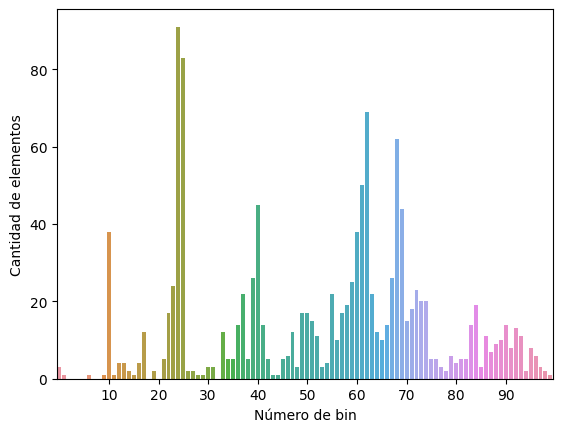

In [31]:

keys = sorted(p_j.keys())
pj = [p_j[x] for x in range(keys[0], m + 1)]
pos = list(range(10, m, 10))
fig = sns.barplot(x=list(range(keys[0], m + 1)), y=pj)
fig.set_xticks(ticks=pos, labels=[f'{x}' for x in pos])
fig.set_xlabel('Número de bin')
_ = fig.set_ylabel('Cantidad de elementos')

In [33]:
# Se busca el valor h que minimiza la ecuación iterando por diferentes valores de m
def riesgo(D, m=10):
    """Riesgo de validación cruzada de histograma"""
    N = D.shape[0]
    limits = np.linspace(D.min(), D.max(), m + 1)
    h = limits[1] - limits[0]
    _ = np.searchsorted(limits, D, side='right')
    _[_ == 0] = 1
    _[_ == m + 1] = m
    p_j = Counter(_)
    cuadrado = sum([(x / N)**2 for x in p_j.values()])
    return (2 / ((N - 1) * h)) - ((N + 1) * cuadrado / ((N - 1) * h))

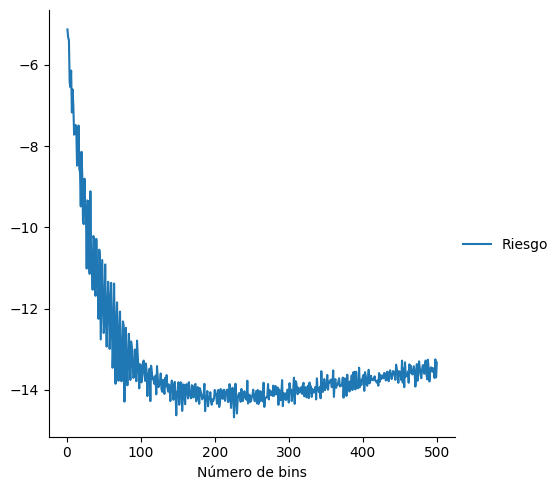

In [34]:
rr = [riesgo(D, m=i) for i in range(1, 501)]
data = pd.DataFrame({'Riesgo': rr, 'Número de bins': list(range(1, 501))})
data.set_index('Número de bins', inplace=True)
_ = sns.relplot(data, kind='line')

In [63]:
len(x)
len(D)

1266

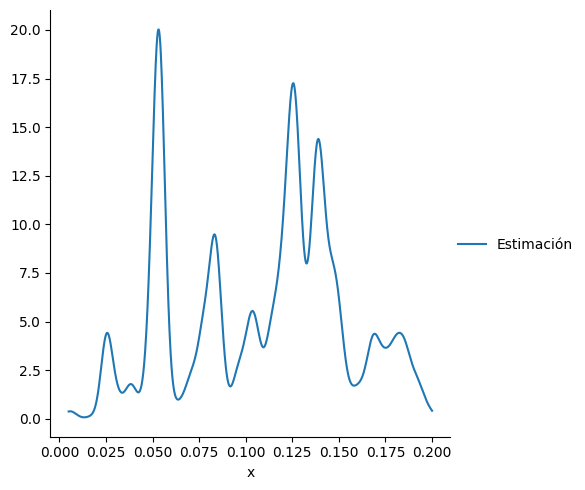

In [37]:

def hat_f(x, D, h):
    N = D.shape[0]
    return norm.pdf((x - D) / h).sum() / (h * N)

x = np.linspace(D.min(), D.max(), D.shape[0])
data = pd.DataFrame({'Estimación': [hat_f(_, D, 0.003) for _ in x], 'x': x})
data.set_index('x', inplace=True)
_ = sns.relplot(data, kind='line')

In [54]:

def plot_h_effect(h):
    x = np.linspace(D.min(), D.max(), D.shape[0])
    data = pd.DataFrame({'Estimación': [hat_f(_, D, h) for _ in x], 'x': x})

    data = data.reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='x', y='Estimación')
    plt.title(f'Effect of h={h}')
    plt.xlabel('x')
    plt.ylabel('Estimación')
    plt.show()

h_slider = FloatSlider(value=0.001, min=0.003, max=0.03, step=0.001, description='h')

interact(plot_h_effect, h=h_slider)

interactive(children=(FloatSlider(value=0.003, description='h', max=0.03, min=0.003, step=0.001), Output()), _…

<function __main__.plot_h_effect(h)>

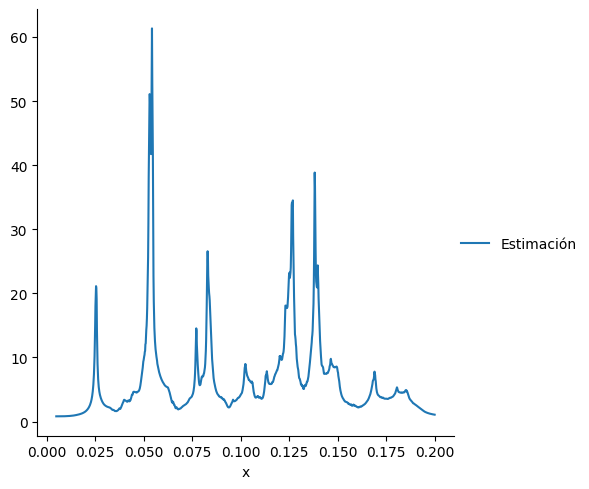

In [56]:

def hat_f_k(x, D, k):
    _ = np.fabs(D - x)
    _.sort()
    h = _[k]
    N = D.shape[0]
    return norm.pdf((x - D) / h).sum() / (h * N)

x = np.linspace(D.min(), D.max(), D.shape[0])
data = pd.DataFrame({'Estimación': [hat_f_k(_, D, 20) for _ in x], 'x': x})
data.set_index('x', inplace=True)
_ = sns.relplot(data, kind='line')

In [66]:
def plot_k_effect(k):
    x = np.linspace(D.min(), D.max(), D.shape[0])
    data = pd.DataFrame({'Estimación': [hat_f_k(_, D, k) for _ in x], 'x': x})

    data = data.reset_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='x', y='Estimación')
    plt.title(f'Efecto de k={k}')
    plt.xlabel('x')
    plt.ylabel('Estimación')
    plt.show()

k_slider = IntSlider(value=50, min=2, max=100, step=1, description='k')

interact(plot_k_effect, k=k_slider)


interactive(children=(IntSlider(value=50, description='k', min=2), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_k_effect(k)>

In [ ]:
# ¿Con qué criterio se determina k (el número de vecinos o similares)?
# Por ejemplo en K-Means iteras hasta que ya no se mueven los centroides.

In [ ]:
# En kNN los parámetros son distancia y número de vecinos

# Reducción Dimensional
(Aprendizaje Supervizado)

# Técnicas de reducción dimensional

- Selección basada en estadística
- Conjunto de validación y validación cruzada
- Selección hacia adelante
- Análisis de componentes principales

In [2]:
!pip install scipy
!pip install skearn
!pip install EvoMSA

     ---------------------------------------- 0.0/44.0 MB ? eta -:--:--
     --------------------------------------- 0.0/44.0 MB 991.0 kB/s eta 0:00:45
     ---------------------------------------- 0.2/44.0 MB 2.1 MB/s eta 0:00:21
     ---------------------------------------- 0.3/44.0 MB 2.3 MB/s eta 0:00:20
     ---------------------------------------- 0.5/44.0 MB 3.0 MB/s eta 0:00:15
      --------------------------------------- 0.7/44.0 MB 3.1 MB/s eta 0:00:15
      --------------------------------------- 0.7/44.0 MB 2.6 MB/s eta 0:00:17
      --------------------------------------- 1.0/44.0 MB 3.1 MB/s eta 0:00:14
     - -------------------------------------- 1.2/44.0 MB 3.3 MB/s eta 0:00:13
     - -------------------------------------- 1.4/44.0 MB 3.5 MB/s eta 0:00:13
     - -------------------------------------- 1.7/44.0 MB 3.8 MB/s eta 0:00:12
     - -------------------------------------- 2.0/44.0 MB 4.1 MB/s eta 0:00:11
     -- ------------------------------------- 2.3/44.0 MB 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement skearn (from versions: none)
ERROR: No matching distribution found for skearn

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/32.4 MB ? eta -:--:--
     --------------------------------------- 0.0/32.4 MB 960.0 kB/s eta 0:00:34
     ---------------------------------------- 0.2/32.4 MB 1.8 MB/s eta 0:00:18
     ---------------------------------------- 0.3/32.4 MB 2.0 MB/s eta 0:00:17
      --------------------------------------- 0.5/32.4 MB 3.0 MB/s eta 0:00:11
      --------------------------------------- 0.6/32.4 MB 2.6 MB/s eta 0:00:13
      --------------------------------------- 0.8/32.4 MB 2.9 MB/s eta 0:00:11
     - -------------------------------------- 1.1/32.4 MB 3.3 MB/s eta 0:00:10
     - -------------------------------------- 1.1/32.4 MB 3.1 MB/s eta 0:00:11
     - -------------------------------------- 1.4/32.4 MB 3.4 MB/s eta 0:00:09
     -- ------------------------------------- 1.6/32.4 MB 3.6 MB/s eta 0:00:09
     -- ------------------------------------- 1.8/32.4 MB 3.6 MB/s eta 0:00:09
     -- ------------------------------------- 2.0/32.4 MB 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
     ------------------------- -------------- 61.4/97.9 kB 1.7 MB/s eta 0:00:01
     ---------------------------------------- 97.9/97.9 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/268.3 kB ? eta -:--:--
     -------------------- ----------------- 143.4/268.3 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 268.3/268.3 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
     ---------------------------------------- 78.3/78.3 kB 4.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.7 MB 1.3 MB/s eta 0:00:09
     ---------------------------------------- 0.1/10.7 MB 1.7 MB/s eta 0:00:07
      --------------------------------------- 0.2/10.7 MB 2.3 MB/s eta 0:00:05
     - -------------------------------------- 0.4/10.7 MB 2.7 MB/s eta 0:00:04
     -- ------------------------------------- 0.7/10.7 MB 3.1 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/10.7 MB 3.0 MB/s eta 0:00:04
     -- ------------------------------------- 0.8/10.7 MB 3.0 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/10.7 MB 3.5 MB/s eta 0:00:03
     ----- ---------------------------------- 1.4/10.7 MB 3.4 MB/s eta 0:00:03
     ------ --------------------------------- 1.7/10.7 MB 3.7 MB/s eta 0:00:03
     ------ --------------------------------- 1.9/10.7 MB 3.7 MB/s eta 0:00:03
     -------- ------------------------------- 2.2/10.7 MB 4


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.6 MB 1.4 MB/s eta 0:00:06
     ---------------------------------------- 0.1/7.6 MB 1.3 MB/s eta 0:00:06
      --------------------------------------- 0.1/7.6 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.2/7.6 MB 1.4 MB/s eta 0:00:06
     - -------------------------------------- 0.3/7.6 MB 1.3 MB/s eta 0:00:06
     - -------------------------------------- 0.4/7.6 MB 1.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.5/7.6 MB 1.6 MB/s eta 0:00:05
     -- ------------------------------------- 0.6/7.6 MB 1.7 MB/s eta 0:00:05
     --- ------------------------------------ 0.7/7.6 MB 1.8 MB/s eta 0:00:04
     ---- ----------------------------------- 0.8/7.6 MB 1.8 MB/s eta 0:00:04
     ---- ----------------------------------- 1.0/7.6 MB 1.9 MB/s eta 0:00:04
     ------ --------------------------------- 1.2/7.6 MB 2.1 MB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Dependencias
from scipy.stats import multivariate_normal, norm, kruskal
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris
from sklearn.feature_selection import f_regression, SelectKBest, SequentialFeatureSelector
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import recall_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn import decomposition
from EvoMSA.model import GaussianBayes
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
sns.set_theme()

# Se utiliza problema sintético de tres clases para describir el algoritmo de selección. 
Se trata de tres distribuciones gaussianas donde se geeneran tres muestras de 1000 elementos.

In [8]:
p1 = multivariate_normal(mean=[5, 5], cov=[[4, 0], [0, 2]])
p2 = multivariate_normal(mean=[1.5, -1.5], cov=[[2, 1], [1, 3]])
p3 = multivariate_normal(mean=[12.5, -3.5], cov=[[2, 3], [3, 7]])

In [9]:
X_1 = p1.rvs(size=1000)
X_2 = p2.rvs(size=1000)
X_3 = p3.rvs(size=1000)

In [10]:
X_1.shape

(1000, 2)

In [11]:
D = np.concatenate((X_1, X_2, X_3), axis = 0)
y = np.array(['a']*X_1.shape[0] + ['b']*X_2.shape[0] + ['c']*X_3.shape[0])
y

array(['a', 'a', 'a', ..., 'c', 'c', 'c'], dtype='<U1')

### Se incluye una variable aleatoria que no tiene relación con la clase con media 2 y varianza 3.

In [12]:
N = norm.rvs(loc = 2, scale = 3, size = 3000)
D = np.concatenate((D, np.atleast_2d(N).T), axis = 1)
D.shape

(3000, 3)

El objetivo es encontrar la variable que no está relacionada con la salida. Una manera de realizar esto es imaginar que si la media en las diferentes variables es la misma en todas las clases entonces esa variable no contribuye a discriminar la clase. En la sección Estimación de Parámetros se presentó el procedimiento para obtener las medias que definen P(X∣Y)  para cada clase. El siguiente código muestra el procedimiento para calcular las medías que son μ1=[4.9694, 5.0407,1.9354]⊺, μ2=[1.5279,−1.4644,2.0522]


In [13]:
labels = np.unique(y)
[np.mean(D[y==i], axis=0) for i in labels]

[array([4.90812947, 4.97728675, 1.88689991]),
 array([ 1.55054182, -1.43086155,  1.98238932]),
 array([12.58618792, -3.34751449,  2.03049336])]

In [14]:
labels

array(['a', 'b', 'c'], dtype='<U1')

Si se puede suponer que los datos provienen de una Distribución Gausiana entonces la prueba a realizar es ANOVA, en caso contrario se puede utilizar su equivalente método no paramétrico como es la prueba Kruskal-Wallis. Considerando que de manera general se desconoce la distribución que genera los datos, entonces se presenta el uso de la segunda prueba.

La hipótesis nula en KW es que las muestras provienen de la misma distribución. 
Los valores p obtenidos son: [0.0,0.0,0.5938] lo cual indica que para las primeras dos variables la hipótesis nula se puede rechazar y por el otro lado la hipótesis nula es factible para la tercera variable con un valor p=0.5938


In [15]:
res = [kruskal(*[D[y==l, i] for l in labels]).pvalue
       for i in range(D.shape[1])]

res

[0.0, 0.0, 0.7174061703276866]

F es equivalente a Kruskal-Wallis en regresión. 

Ho: el coeficiente obtenido en la regresión lineal entre las variables independientes y dependiente es cero. 

In [16]:
X, y = load_diabetes(return_X_y=True)
f_statistics, p_values = f_regression(X, y)

In [17]:
X.shape

(442, 10)

In [18]:
y.shape

(442,)

In [19]:
f_statistics

array([ 16.10137401,   0.81742349, 230.65376449, 106.52013086,
        20.71056745,  13.74607917,  81.23965868, 100.06926441,
       207.27119362,  75.3996832 ])

In [20]:
sel = SelectKBest(score_func=f_regression, k=9).fit(X, y)
sel.get_support(indices=True)

array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

# Conjuntos de validación y validación cruzada

Entonces para optimizar los parámetros del algoritmo se selecciona del conjunto de entrenamiento, i.e., T, el conjunto de validación, V. Este conjunto tiene la característica que T∩V∩G=∅  y T∪V∪G=D.

Una manera de realizar estos es seleccionar primeramente el conjunto de prueba G
y de los datos restantes generar los conjuntos de entrenamiento T  y validación V.

Para ejemplificar esta idea se utiliza el ejemplo de Breast Cancer Wisconsin utilizando un Clasificador Bayesiano donde el hiperparámetro es si se utilizar un Bayesiano Ingenuo o se estima la matriz de covarianza.

In [ ]:
D, y = load_breast_cancer(return_X_y=True)


In [ ]:
D.shape

In [ ]:
T, G, y_t, y_g = train_test_split(D, y, test_size=0.2)

Los datos de entrenamiento y validación se generan de manera equivalente tal como se muestra en la siguiente instrucción. El conjunto de validación (V) se encuentra en la variable V y la variable dependiente en y_v.

In [ ]:
T, V, y_t, y_v = train_test_split(T, y_t, test_size=0.3)

En este momento ya se tienen todos los elementos para medir el redimiento de cada hiperparámetro. Empezando por el clasificador con la matriz de covarianza completa. El recall en ambas clases es [0.9388,0.9886].

In [ ]:
gaussian = GaussianBayes().fit(T, y_t)
hy_gaussian = gaussian.predict(V)
recall_score(y_v, hy_gaussian, average=None)

# Bayesiano ingenuo

In [ ]:
ingenuo = GaussianBayes(naive=True).fit(T, y_t)
hy_ingenuo = ingenuo.predict(V)
recall_score(y_v, hy_ingenuo, average=None)

# AHora se utiliza tod el conjunto de datos de entrenamiento en bayes normal (toda la matriz de covarianza)

In [ ]:
gaussian = GaussianBayes().fit(np.concatenate((T, V)), np.concatenate((y_t, y_v)))
hy_gaussian = gaussian.predict(G)
recall_score(y_g, hy_gaussian, average=None)

In [ ]:
# qué pasaría con un naive
gaussian = GaussianBayes(naive=True).fit(np.concatenate((T, V)), np.concatenate((y_t, y_v)))
hy_gaussian = gaussian.predict(G)
recall_score(y_g, hy_gaussian, average=None)

# K-fold cross validation
La idea es entrenar y probar el rendimiento del algoritmo 
k
 veces usando las particiones en cada renglón. Es decir, la primera vez se usan los datos de la primera columna como el conjunto de validación, y el resto de columnas, 
[
2
,
3
,
4
,
5
], como conjunto de entrenamiento para estimar los parámetros del algoritmo. En la segunda iteración se usan los datos del segundo renglón donde se observa que los datos en la cuarta columna corresponden al conjunto de validación y los datos en las columnas [1,2,3,5] son usados como conjunto de prueba. Las iteraciones siguen hasta que todos los datos fueron utilizados en una ocasión como conjunto de validación.

In [ ]:
T, G, y_t, y_g = train_test_split(D, y, test_size=0.2)

In [ ]:
T.shape

In [ ]:
G.shape

La validación cruzada con k-iteraciones se puede realizar con la clase KFold de la siguiente manera. La primera línea crear una variable para guardar el rendimiento. En la segunda línea se inicializa el procedimiento indicando que los datos sean tomados al azar. Después se realiza el ciclo con las  k iteraciones, para cada iteración se genera un índice ts que indica cuales son los datos del conjunto de entrenamiento y vs que corresponde a los datos de validación. Se estiman los parámetros usando ts tal y como se observa en la cuarta línea. Habiendo estimado los parámetros se predicen los datos del conjunto de validación (5 línea), se mide el recall en todas las clases y se guarda en la lista perf. Al final se calcula la media de los k rendimientos medidos, teniendo un valor de [0.8943,0.9818].

In [ ]:
perf = []
kfold = KFold(shuffle=True)
for ts, vs in kfold.split(T):
    gaussian = GaussianBayes().fit(T[ts], y_t[ts])
    hy_gaussian = gaussian.predict(T[vs])
    _ = recall_score(y_t[vs], hy_gaussian, average=None)    
    perf.append(_)
bayesiano = np.mean(perf, axis=0)
bayesiano

In [ ]:
kfold

In [ ]:
perf = []
kfold = KFold(shuffle=True)
for ts, vs in kfold.split(T):
    gaussian = GaussianBayes(naive=True).fit(T[ts], y_t[ts])
    hy_gaussian = gaussian.predict(T[vs])
    _ = recall_score(y_t[vs], hy_gaussian, average=None)    
    perf.append(_)
ingenuo = np.mean(perf, axis=0)
ingenuo

In [ ]:
pd.DataFrame({'Clasificador Bayesiano': bayesiano, 'Clasificador Bayesiano Ingenuo': ingenuo })

# Selección hacia adelante
Un procedimiento que pone en el centro del proceso de selección al algoritmo de aprendizaje utilizado es Selección hacia Adelante y su complemento que sería Selección hacia Atrás. El algoritmo de selección hacia adelante es un procedimiento iterativo que selecciona una variable a la vez guiada por el rendimiento de esta variable cuando es usada en el algoritmo de aprendizaje. Al igual que los procedimientos anteriores este no modifica las características del problema, solamente selecciona las que se consideran relevantes.

En selección hacia adelante y hacia atrás se inicia con el conjunto de entrenamiento 
T = {(xi,yi)}, con una función L que mide el rendimiento del algoritmo de aprendizaje H.
 La idea es ir seleccionando de manera iterativa aquellas variables que generan un modelo con mejores capacidades de generalización. Para medir la generalización del algoritmo se pueden realizar de diferentes maneras, una es mediante la división de 
X  en dos conjuntos: entrenamiento y validación; y la segunda manera corresponde a utilizar k-iteraciones de validación cruzada.

In [ ]:
perf = []
kfold = KFold(shuffle=True)
for var in range(T.shape[1]):
    T1 = T[:, np.array([var])]
    perf_inner = []
    for ts, vs in kfold.split(T1):
        gaussian = GaussianNB().fit(T1[ts], y_t[ts])
        hy_gaussian = gaussian.predict(T1[vs])
        _ = recall_score(y_t[vs], hy_gaussian, average='macro')    
        perf_inner.append(_)
    perf.append(np.mean(perf_inner))

In [ ]:
plt.plot(perf, marker='o', linestyle='-', color='skyblue')
plt.grid(True, linestyle='--', alpha=0.6)

In [ ]:
sns.barplot(x=list(range(len(perf))), y=perf)
plt.grid()
plt.xlabel('Variable')
plt.ylabel('Macro-Recall')

# Implementación de la selección hacia adelante y hacia atrás

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector

In [ ]:
kfolds = list(KFold(shuffle=True).split(T))
scoring = make_scorer(lambda y, hy: recall_score(y, hy, average='macro'))
seq = SequentialFeatureSelector(estimator=GaussianNB(),
                                scoring=scoring,
                                n_features_to_select='auto',
                                cv=kfolds).fit(T, y_t)

In [ ]:
len(kfolds)

In [ ]:
scoring

In [ ]:
seq

In [ ]:
mask = seq.get_support()
mask

In [ ]:
variables_seleccionadas = [i for i, m in enumerate(mask, start=0) if m and 1 <= i <= 30]
variables_seleccionadas

In [ ]:
seq2 = SequentialFeatureSelector(estimator=GaussianNB(),
                                direction= 'backward',
                                scoring=scoring,
                                n_features_to_select='auto',
                                cv=kfolds).fit(T, y_t)

In [ ]:
mask2 = seq.get_support()
mask2

In [ ]:
variables_seleccionadas_bkw = [i for i, m in enumerate(mask2, start=0) if m and 1 <= i <= 30]
variables_seleccionadas_bkw

[1, 4, 8, 9, 11, 14, 16, 18, 19, 20, 21, 22, 24, 26] con el forward

[0,2,3,6,7,10,12, 13, 20,22, 23, 26, 27] a mano, tendrá que ver con la voracidad del algortimo y el mínimo local?

# PCA

In [ ]:
D, y = load_iris(return_X_y=True)


In [ ]:
D.shape

In [ ]:
D

In [ ]:
pca = decomposition.PCA(n_components=2).fit(D) #inicialización de clase
Xn = pca.transform(D) #proyección

In [ ]:
pca

In [ ]:
Xn

In [ ]:
data = pd.DataFrame([dict(x=x, y=y, clase=c)
                     for (x, y), c in zip(Xn, y)])
sns.relplot(data, kind='scatter',
            x='x', y='y', hue='clase')

In [ ]:
data

In [ ]:
error_naive

In [ ]:
diff = (y_g != hy_naive).mean() -  (y_g != hy_gaussian).mean()


In [ ]:
S = np.random.randint(y_g.shape[0],
                      size=(500, y_g.shape[0]))
B = [(y_g[s] != hy_naive[s]).mean() -  (y_g[s] != hy_gaussian[s]).mean()
     for s in S]
se = np.std(B, axis=0)


In [ ]:
sns.displot(B, kde=True)



In [ ]:
dist = norm(loc=diff, scale=se)
dist.cdf(0)

In [ ]:
import numpy as np
T = np.loadtxt('delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos_train_label.csv', delimiter=',')
G = np.loadtxt('delitos_test_data.csv', delimiter=',')
y_g = np.loadtxt('delitos_test_label.csv', delimiter=',')

In [ ]:
# Assuming you have a custom GaussianBayes classifier
from your_custom_module import GaussianBayes

# Create and train the GaussianBayes classifier with the naive parameter set to True
naive_classifier = GaussianBayes(naive=True)
naive_classifier.fit(T, y_t)

# Make predictions on the test data
y_pred = naive_classifier.predict(G)
predicted_probs = naive_classifier.predict_proba(G)

# Calculate cross-entropy (log loss)
cross_entropy = log_loss(y_g, predicted_probs)
print("Cross-Entropy (Log Loss):", cross_entropy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_g, y_pred)

# Calculate recall, precision, and F1-score
recall = recall_score(y_g, y_pred, average='weighted')
precision = precision_score(y_g, y_pred, average='weighted')
f1 = f1_score(y_g, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)



In [ ]:
from EvoMSA.model import GaussianBayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.datasets import load_breast_cancer
import numpy as np

# Load a sample dataset for classification (Breast Cancer dataset)
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the GaussianBayes classifier with the naive parameter set to True
naive_classifier = GaussianBayes(naive=True)
naive_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_classifier.predict(X_test)
predicted_probs = naive_classifier.predict_proba(X_test)

# Calculate cross-entropy (log loss)
cross_entropy = log_loss(y_test, predicted_probs)
print("Cross-Entropy (Log Loss):", cross_entropy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate recall, precision, and F1-score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)


In [21]:
from EvoMSA.model import GaussianBayes
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix, recall_score, precision_score, f1_score

# Assuming you have loaded your data as T (X_training), y_t (y_training), G (X_test), and y_g (y_test)

# Create and train the GaussianBayes classifier with the naive parameter set to True
naive_classifier = GaussianBayes(naive=True)
naive_classifier.fit(T, y_t)

# Make predictions on the test data
y_pred = naive_classifier.predict(G)
predicted_probs = naive_classifier.predict_proba(G)

# Calculate cross-entropy (log loss)
cross_entropy = log_loss(y_g, predicted_probs)
print("Cross-Entropy (Log Loss):", cross_entropy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_g, y_pred)

# Calculate recall, precision, and F1-score
recall = recall_score(y_g, y_pred, average='weighted')
precision = precision_score(y_g, y_pred, average='weighted')
f1 = f1_score(y_g, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)


NameError: name 'T' is not defined

# PRUEBA

Escoger el número de variables seleccionadas, utilizando la estadística de kruskal, en el conjunto de delitos, usando su conjunto de entrenamiento.

El conjunto de delitos se puede descargar de la siguiente liga https://github.com/INGEOTEC/AprendizajeComputacional/releases/download/v2.0/delitos.zip

Para leer los datos puede ser util las siguientes instrucciones.

In [22]:
T = np.loadtxt('delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos_train_label.csv', delimiter=',')

In [31]:
T.shape

(1440, 1744)

In [30]:
np.unique(y_t)

array([0., 1.])

In [32]:
labels = np.unique(y_t)
[np.mean(T[y_t==i], axis=0) for i in labels]

[array([-0.0059585 , -0.02123151, -0.01948778, ..., -0.01739203,
        -0.02865134, -0.03056604]),
 array([-0.00820332, -0.02291462, -0.0211615 , ..., -0.02138628,
        -0.03310868, -0.03636104])]

In [33]:
res = [kruskal(*[T[y_t==l, i] for l in labels]).pvalue
       for i in range(T.shape[1])]

In [36]:
res

[0.002455442675677453,
 0.057064808154885314,
 0.036307722501102424,
 0.003007083426679422,
 0.006994756899056409,
 0.030460194597405753,
 8.593738451736462e-06,
 0.0006025247925134137,
 0.0012786406216368693,
 0.0001236241848024989,
 0.00040324465496617714,
 0.002412296150960004,
 1.5728339630772982e-07,
 0.041558104024769595,
 0.0003925549130166696,
 0.0008790749832485675,
 0.015979538058293014,
 2.7991506653924233e-07,
 1.7652029493635364e-10,
 2.3043463722495768e-07,
 4.3536102269661193e-23,
 1.8031540797301777e-05,
 1.8374733931750202e-06,
 0.0010131957607162063,
 0.0017521643148553933,
 0.0025269133441559667,
 0.00030230774821167174,
 1.1161767178677637e-08,
 3.2401720392069025e-18,
 0.015752930572313716,
 0.022526783119012014,
 1.620729739457692e-08,
 0.011424371345465019,
 1.3389653215298112e-06,
 0.013300028726629607,
 0.07048350779084575,
 0.004728571742561235,
 0.00029480378130438046,
 0.014732394867144904,
 0.06683188586814053,
 0.001122946256788405,
 1.3506957953900423e-06

In [39]:
# todos
type(res)

list

In [42]:
# alpha = 0.05
alpha = 0.1
primer_criterio = [x for x in res if x <= alpha]
len(primer_criterio)

1706

# SEGUNDA FASE

In [43]:

T = np.loadtxt('delitos_train_data.csv', delimiter=',')
y_t = np.loadtxt('delitos_train_label.csv', delimiter=',')
G = np.loadtxt('delitos_test_data.csv', delimiter=',')
y_g = np.loadtxt('delitos_test_label.csv', delimiter=',')

Los datos de entrenamiento y validación se generan de manera equivalente tal como se muestra en la siguiente instrucción. El conjunto de validación (

 ) se encuentra en la variable V y la variable dependiente en y_v.

In [44]:
T, V, y_t, y_v = train_test_split(T, y_t, test_size=0.3)

In [45]:
T.shape

(1008, 1744)

In [46]:
V.shape

(432, 1744)

In [47]:
gaussian = GaussianBayes(naive=True).fit(T, y_t)
hy_gaussian = gaussian.predict(V)
recall_score(y_v, hy_gaussian, average=None)

array([0.78527607, 0.87735849])

In [56]:
hy_gaussian = gaussian.predict(G)
prueba = recall_score(y_g, hy_gaussian, average=None)
np.sum(prueba)/2


0.7969792438843588

In [57]:
perf = []
kfold = KFold(shuffle=True)
for ts, vs in kfold.split(T):
    gaussian = GaussianBayes(naive=True).fit(T[ts], y_t[ts])
    hy_gaussian = gaussian.predict(T[vs])
    _ = recall_score(y_t[vs], hy_gaussian, average=None)    
    perf.append(_)
kfold_results = np.mean(perf, axis=0)

np.sum(kfold_results)/2

0.8409736252213282

C:\Users\rodri\OneDrive\Imágenes\Documentos\INFOTEC\Segundo Trimestre\Aprendizaje Computacional\Unidad 5 (Reducción Dimensional)\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


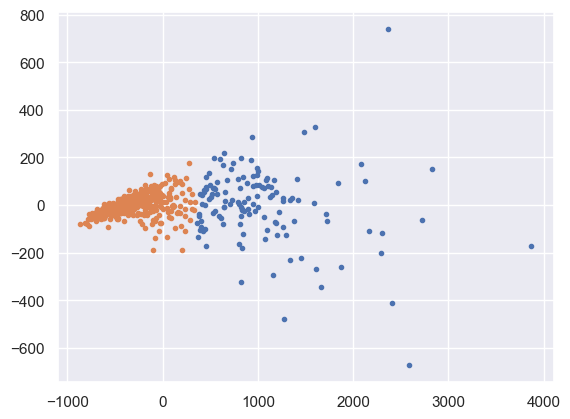

In [68]:
from sklearn import datasets
from sklearn import decomposition
import numpy as np
from matplotlib import pylab as plt
from sklearn.cluster import KMeans

X, y = datasets.load_breast_cancer(return_X_y=True)
pca = decomposition.PCA(n_components=2).fit(X)
Xn = pca.transform(X)
m = KMeans(n_clusters=2).fit(Xn)
mask = m.predict(Xn)

plt.plot(Xn[mask==0, 0], Xn[mask==0, 1], '.')
plt.plot(Xn[mask==1, 0], Xn[mask==1, 1], '.')

C:\Users\rodri\OneDrive\Imágenes\Documentos\INFOTEC\Segundo Trimestre\Aprendizaje Computacional\Unidad 5 (Reducción Dimensional)\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


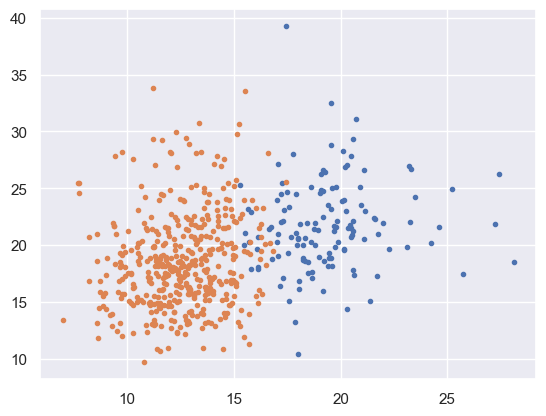

In [66]:
from sklearn import datasets
from sklearn import decomposition
import numpy as np
from matplotlib import pylab as plt
from sklearn.cluster import KMeans

X, y = datasets.load_breast_cancer(return_X_y=True)
# pca = decomposition.PCA(n_components=2).fit(X)
# Xn = pca.transform(X)
m = KMeans(n_clusters=2).fit(X)
mask = m.predict(X)

plt.plot(X[mask==0, 0], X[mask==0, 1], '.')
plt.plot(X[mask==1, 0], X[mask==1, 1], '.')

In [63]:
X.shape

(569, 30)

In [64]:
Xn.shape

(569, 2)